In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data
import matplotlib.pyplot as plt

In [2]:
dir(data)

['7zip',
 'airports',
 'annual_precip',
 'anscombe',
 'barley',
 'birdstrikes',
 'budget',
 'budgets',
 'burtin',
 'cars',
 'climate',
 'co2_concentration',
 'countries',
 'crimea',
 'disasters',
 'driving',
 'earthquakes',
 'ffox',
 'flare',
 'flare_dependencies',
 'flights_10k',
 'flights_200k',
 'flights_20k',
 'flights_2k',
 'flights_3m',
 'flights_5k',
 'flights_airport',
 'gapminder',
 'gapminder_health_income',
 'gimp',
 'github',
 'graticule',
 'income',
 'iowa_electricity',
 'iris',
 'jobs',
 'la_riots',
 'londonBoroughs',
 'londonCentroids',
 'londonTubeLines',
 'lookup_groups',
 'lookup_people',
 'miserables',
 'monarchs',
 'movies',
 'normal_2d',
 'obesity',
 'ohlc',
 'points',
 'population',
 'population_engineers_hurricanes',
 'seattle_temps',
 'seattle_weather',
 'sf_temps',
 'sp500',
 'stocks',
 'udistrict',
 'unemployment',
 'unemployment_across_industries',
 'uniform_2d',
 'us_10m',
 'us_employment',
 'us_state_capitals',
 'volcano',
 'weather',
 'weball26',
 'wheat',

In [3]:
health_income_data = data.gapminder_health_income()
health_income_data

,country,income,health,population
0,Afghanistan,1925,57.63,32526562
1,Albania,10620,76.00,2896679
2,Algeria,13434,76.50,39666519
3,Andorra,46577,84.10,70473
4,Angola,7615,61.00,25021974
...,...,...,...,...
182,Vietnam,5623,76.50,93447601
183,West Bank and Gaza,4319,75.20,4668466
184,Yemen,3887,67.60,26832215
185,Zambia,4034,58.96,16211767


In [4]:
health_income_data.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', '

In [5]:
import altair as alt
alt.Chart(health_income_data).mark_point().encode(
    x = 'health',
    y = 'population',
    color = 'income'
).interactive()

/home/bockdepa/anaconda3/envs/py4sci/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

<Axes: xlabel='health', ylabel='income'>

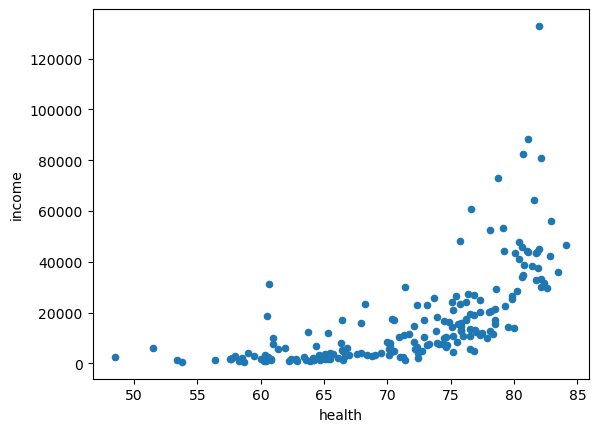

In [6]:
health_income_data.plot.scatter('health', 'income')

In [7]:
group_country = health_income_data.groupby('country').mean(numeric_only=True)
group_country

,income,health,population
country,,,
Afghanistan,1925.0,57.63,32526562.0
Albania,10620.0,76.00,2896679.0
Algeria,13434.0,76.50,39666519.0
Andorra,46577.0,84.10,70473.0
Angola,7615.0,61.00,25021974.0
...,...,...,...
Vietnam,5623.0,76.50,93447601.0
West Bank and Gaza,4319.0,75.20,4668466.0
Yemen,3887.0,67.60,26832215.0


In [8]:
# sort the data by population (smallest country first)

sort_pop = group_country.sort_values('population')
sort_pop

,income,health,population
country,,,
Marshall Islands,3661.0,65.1,5.299300e+04
Andorra,46577.0,84.1,7.047300e+04
Dominica,10503.0,74.6,7.268000e+04
Antigua and Barbuda,21049.0,75.2,9.181800e+04
Seychelles,25684.0,73.7,9.647100e+04
...,...,...,...
Brazil,15441.0,75.6,2.078475e+08
Indonesia,10504.0,70.9,2.575638e+08
United States,53354.0,79.1,3.217736e+08


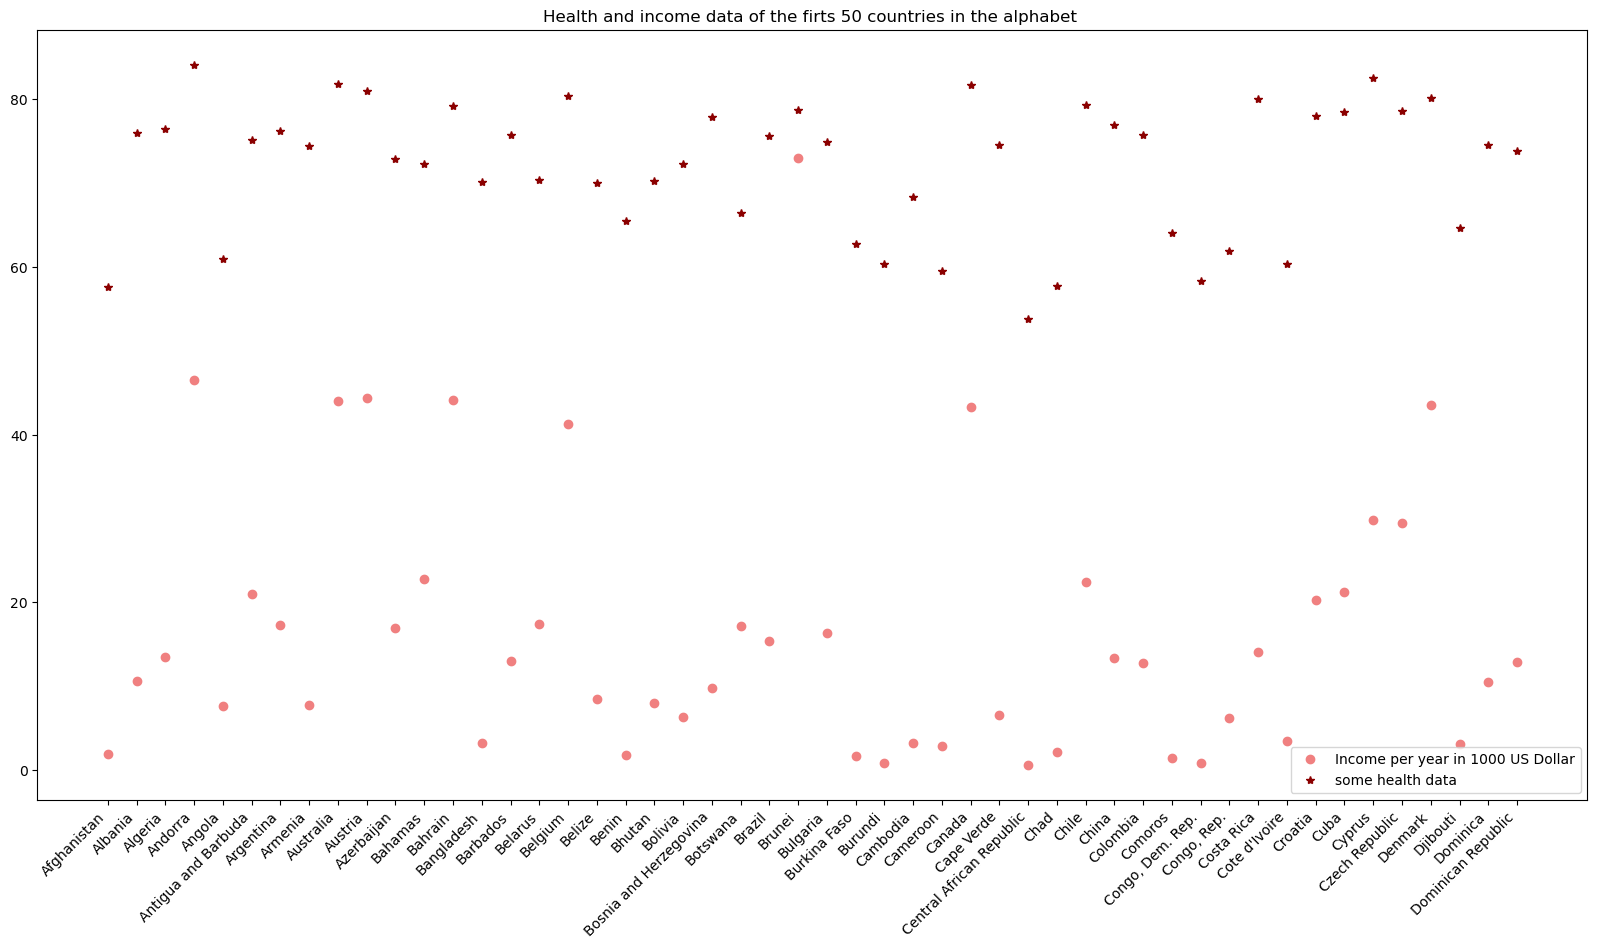

In [35]:
plt.figure(figsize=(20,10))
plt.plot(group_country.income[0:50]/1e03,'o', label='Income per year in 1000 US Dollar', color='lightcoral')
plt.plot(group_country.health[0:50],'*', label='some health data', color='darkred')
plt.legend()
plt.title('Health and income data of the firts 50 countries in the alphabet ')
#xticks = np.array(group_country.health)[::5]
#labels = group_country.
#plt.label(
plt.xticks(rotation = (45), fontsize = 10, va='top', ha='right');